In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [2]:
# import and review data
city_filepath = os.path.join("raw_data","city_data.csv")
ride_filepath = os.path.join("raw_data","ride_data.csv")

city_data = pd.read_csv(city_filepath)
ride_data = pd.read_csv(ride_filepath)

city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
ride_data.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


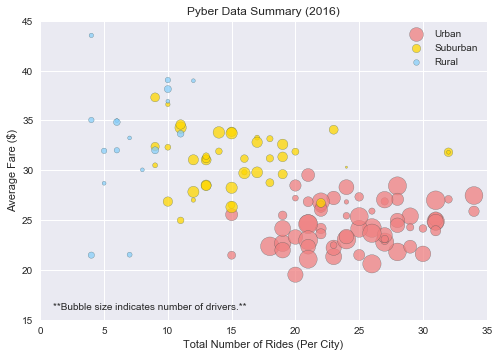

In [4]:
# build a single data frame and merge on city
rides_by_city = ride_data.groupby("city")
avg_fares = rides_by_city["fare"].mean()
total_rides = rides_by_city["ride_id"].count()

fares_and_rides = pd.DataFrame({"average_fare":avg_fares,"ride_count":total_rides})
fares_and_rides = fares_and_rides.reset_index()

cities_combined = pd.merge(city_data, fares_and_rides, on="city")
cities_combined.head()

# split by city type
urban_cities = cities_combined.loc[cities_combined["type"] == "Urban",:]
suburban_cities = cities_combined.loc[cities_combined["type"] == "Suburban",:]
rural_cities = cities_combined.loc[cities_combined["type"] == "Rural",:]

urban_fares = urban_cities["average_fare"]
urban_drivers = urban_cities["driver_count"]
urban_rides = urban_cities["ride_count"]
suburban_fares = suburban_cities["average_fare"]
suburban_drivers = suburban_cities["driver_count"]
suburban_rides = suburban_cities["ride_count"]
rural_fares = rural_cities["average_fare"]
rural_drivers = rural_cities["driver_count"]
rural_rides = rural_cities["ride_count"]

# build scatter plot
plt.scatter(urban_rides, urban_fares, s=urban_drivers*5, c='lightcoral', edgecolor='darkslategray', alpha=0.75)
plt.scatter(suburban_rides, suburban_fares, s=suburban_drivers*5, c='gold', edgecolor='darkslategray', alpha=0.75)
plt.scatter(rural_rides, rural_fares, s=rural_drivers*5, c='lightskyblue', edgecolor='darkslategray', alpha=0.75)
plt.xlim(0,35)
plt.ylim(15,45)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Data Summary (2016)")
plt.legend(["Urban","Suburban","Rural"])
plt.text(1,16,"**Bubble size indicates number of drivers.**")
plt.show()

In [10]:
# group data by city type
cities_combined["total_fares"] = cities_combined["average_fare"]*cities_combined["ride_count"]
city_type_data = cities_combined.groupby("type")

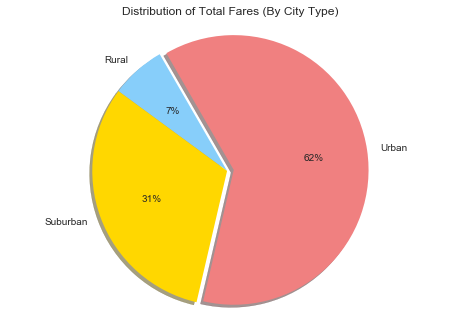

In [11]:
# plot total fares by city type
fares_by_type = city_type_data["total_fares"].sum()
labels = ["Rural","Suburban","Urban"]
colors = ["lightskyblue","gold","lightcoral"]
explode = [0, 0, 0.05]
plt.pie(fares_by_type, labels=labels, colors=colors, explode=explode, autopct='%.0f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title("Distribution of Total Fares (By City Type)")
plt.show()

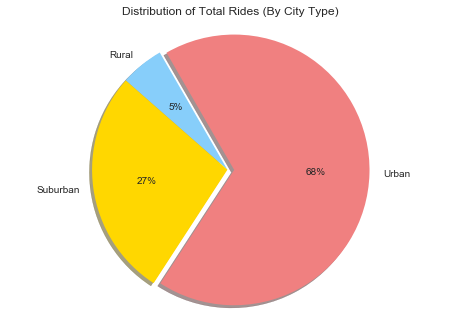

In [6]:
# % of Total Rides by City Type
rides_by_type = city_type_data["ride_count"].sum()
labels = ["Rural","Suburban","Urban"]
colors = ["lightskyblue","gold","lightcoral"]
explode = [0, 0, 0.05]
plt.pie(rides_by_type, labels=labels, colors=colors, explode=explode, autopct='%.0f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title("Distribution of Total Rides (By City Type)")
plt.show()

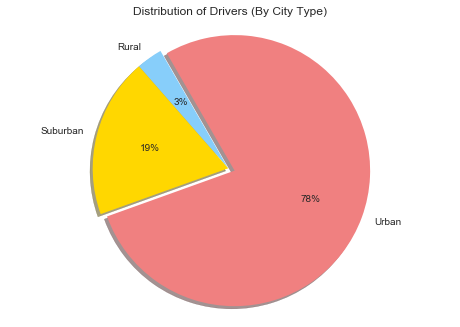

In [7]:
# % of Total Drivers by City Type
drivers_by_type = city_type_data["driver_count"].sum()
labels = ["Rural","Suburban","Urban"]
colors = ["lightskyblue","gold","lightcoral"]
explode = [0, 0, 0.05]
plt.pie(drivers_by_type, labels=labels, colors=colors, explode=explode, autopct='%.0f%%', shadow=True, startangle=120)
plt.axis('equal')
plt.title("Distribution of Drivers (By City Type)")
plt.show()